# Baseline CNN + TF-IDF Bigram

## Import Library

In [11]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.layers import Input, Flatten, Dense, Conv1D, MaxPool1D, Dropout
from keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

## Import Dataset

In [12]:
df = pd.read_csv('tweet_after_preprocessing_29k.csv', usecols = ['detokenize', 'label_1'])
df

,label_1,detokenize
0,1,cewek tolol sedih bego
1,1,goblok tolol idiot
2,1,maling goblok nama akun memelord curi meme mal...
3,1,tolol inimah tau empat ngebut
4,0,tolol tolol madrid bantai ipul anfield ngehek ...
...,...,...
29080,1,sumpah gaco amp mixue ting jadi gue sih bilang...
29081,1,anak lonte ya
29082,1,ya ya bu anak kayak lonte
29083,1,eh tolol bocah cacat situ perangkat desa langs...


In [13]:
df = df.dropna()
df

,label_1,detokenize
0,1,cewek tolol sedih bego
1,1,goblok tolol idiot
2,1,maling goblok nama akun memelord curi meme mal...
3,1,tolol inimah tau empat ngebut
4,0,tolol tolol madrid bantai ipul anfield ngehek ...
...,...,...
29080,1,sumpah gaco amp mixue ting jadi gue sih bilang...
29081,1,anak lonte ya
29082,1,ya ya bu anak kayak lonte
29083,1,eh tolol bocah cacat situ perangkat desa langs...


In [14]:
x = df['detokenize'].copy()
y = df['label_1'].copy()

## Feature Extraction (TF-IDF)

In [15]:
%%time
# define tf-idf
tf_idf = TfidfVectorizer(use_idf=True, smooth_idf=False, ngram_range=(2,2), min_df=5, max_df=0.5, max_features=1000)

# create dataframe using tf-idf
x_bi = pd.DataFrame(tf_idf.fit_transform(x).toarray(), columns=tf_idf.get_feature_names_out())
y_bi = y

x_bi

CPU times: user 673 ms, sys: 47.8 ms, total: 720 ms
Wall time: 725 ms


,ada otak,adu domba,aduh goblok,aduh tolol,agama agama,agama kontol,agnes lonte,ajar orang,akun banci,akun fake,...,ya orang,ya salah,ya sih,ya sudah,ya tau,ya tidak,ya tolol,ya wajar,ya wkwk,ya ya
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
29061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
29062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.808427
29063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


## Splitting Data Ratio 90:10


In [16]:
# splitting Data to 90:10
X_train, X_test, y_train, y_test = model_selection.train_test_split(x_bi, y_bi, test_size = 0.1, random_state=0)

# reshape the train and test data
X_train = np.array(X_train).reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = np.array(X_test).reshape(X_test.shape[0], 1, X_test.shape[1])

## Modelling

In [17]:
%%time
# define the CNN Model
cnn_model = tf.keras.models.Sequential() # create sequential model 
cnn_model.add(Conv1D(filters=32, kernel_size=3, padding='same',  activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (1, X_train.shape[2]))) # first cnn layer with 32 filters, conv window 3, and Leaky relu activation 
cnn_model.add(MaxPool1D(pool_size=3, padding='same')) # second cnn layer using max pooling with pool size 3
cnn_model.add(Dropout(0.2)) # add dropout layer 0.2
cnn_model.add(Flatten()) # flatten the output
cnn_model.add(Dense(units = 1, activation='sigmoid')) # dense as last layer with units=1 and activation sigmoid

# compile the model
cnn_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy']) 
cnn_model.summary()

# plot model architecture
plot_model(cnn_model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

# fit the model on the training data
cnn_model_history = cnn_model.fit(X_train, y_train, epochs=5, batch_size = 64, validation_data = (X_test, y_test))

# evaluate the model and predict
score = cnn_model.evaluate(X_test, y_test, batch_size=64, verbose=0)

print()
print('Validation Accuracy:', score[1])
print('Validation Loss:', score[0])
print()

y_pred = cnn_model.predict(X_test)
y_true = y_test

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 1, 32)             96032     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 32)            0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 1, 32)             0         
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 96,065
Trainable params: 96,065
Non-trainable params: 0
__________________________________________________

In [18]:
# show the classification report from the Model
classreport = classification_report(y_true, y_pred.round(), digits=4)
accscore = accuracy_score(y_true, y_pred.round())
precscore = precision_score(y_true, y_pred.round())
recscore = recall_score(y_true, y_pred.round())
f1score = f1_score(y_true, y_pred.round(), average='weighted')
print('Classification Report :')
print(classreport)

Classification Report :
              precision    recall  f1-score   support

           0     0.6419    0.8465    0.7301      1459
           1     0.7721    0.5242    0.6244      1448

    accuracy                         0.6859      2907
   macro avg     0.7070    0.6853    0.6773      2907
weighted avg     0.7068    0.6859    0.6775      2907



In [19]:
# show the accuracy, f1-Score, precision and recall score
print('Accuracy Score  :', accscore)
print('F1 Score        :', f1score)
print('Precision Score :', precscore)
print('Recall Score    :', recscore)

Accuracy Score  : 0.6859305125558995
F1 Score        : 0.6774777495088208
Precision Score : 0.7721261444557477
Recall Score    : 0.524171270718232


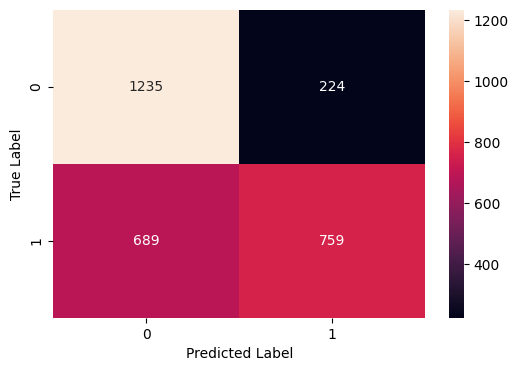

In [20]:
# show the confusion matrix 
f, ax = plt.subplots(figsize=(6,4))
sns.heatmap(confusion_matrix(y_true, y_pred.round()), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()